# NAME: AJAYRAJA RATHINAM T
# REG NO: 212224240006

Face shape: (1102, 899, 3)


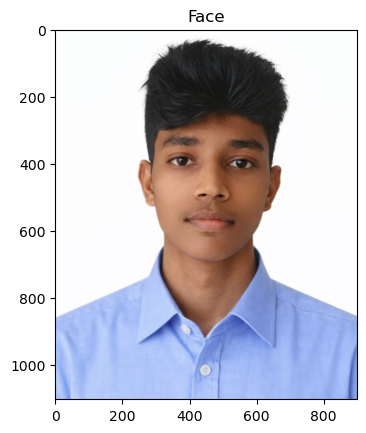

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Load face image
faceImage = cv2.imread("a.jpeg")
plt.imshow(faceImage[:,:,::-1]); plt.title("Face")
print("Face shape:", faceImage.shape)


Glass shape: (1200, 1200, 3)


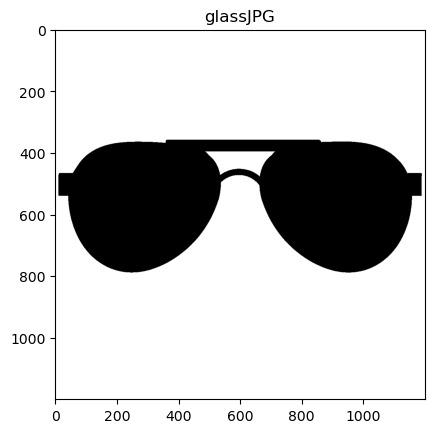

In [2]:
glassJPG = cv2.imread("b.png")
plt.imshow(glassJPG[:,:,::-1]); plt.title("glassJPG")
print("Glass shape:", glassJPG.shape)

Text(0.5, 1.0, 'Sunglass Color channels')

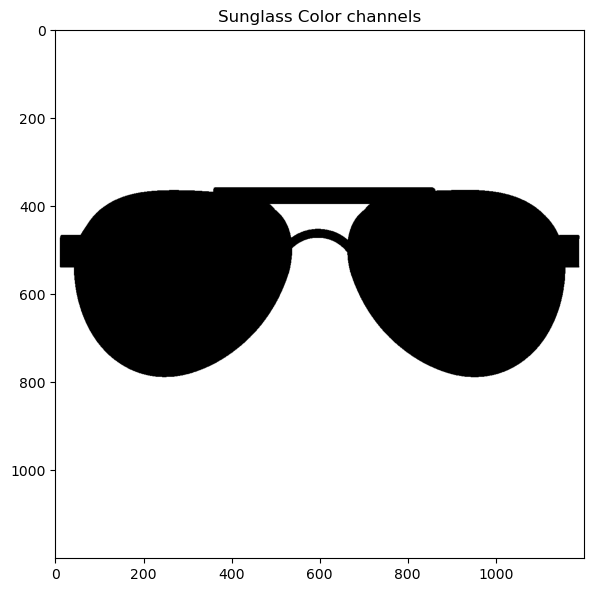

In [3]:
glassBGR = glassJPG[:,:,0:3]
glassGray = cv2.cvtColor(glassBGR, cv2.COLOR_BGR2GRAY)
_, glassMask1 = cv2.threshold(glassGray, 240, 255, cv2.THRESH_BINARY_INV)  # detect non-white

plt.figure(figsize=[15,15])
#Show sunglasses color channels
plt.subplot(121)
plt.imshow(glassBGR[:,:,::-1])  # BGR → RGB
plt.title('Sunglass Color channels')

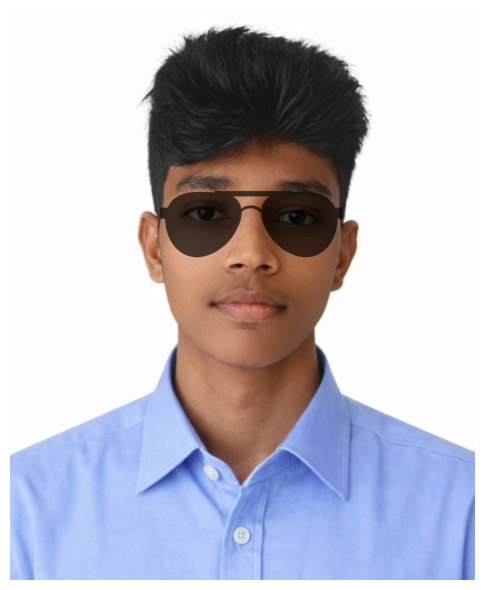

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
faceImage = cv2.imread("a.jpeg")
glassPNG  = cv2.imread("b.png", cv2.IMREAD_UNCHANGED)

if faceImage is None or glassPNG is None:
    print("Error loading images")
    exit()

face_h, face_w, _ = faceImage.shape

# Resize glasses (slightly smaller looks more natural)
new_w = int(face_w * 0.40)
new_h = int(new_w * glassPNG.shape[0] / glassPNG.shape[1])
glass_resized = cv2.resize(glassPNG, (new_w, new_h))

# Split channels
glass_rgb = glass_resized[:, :, :3]
alpha = glass_resized[:, :, 3] / 375.0

x = int(face_w * 0.32)
y = int(face_h * 0.22)

roi = faceImage[y:y+new_h, x:x+new_w]

for c in range(3):
    roi[:, :, c] = (alpha * glass_rgb[:, :, c] +
                    (1 - alpha) * roi[:, :, c])

faceImage[y:y+new_h, x:x+new_w] = roi

plt.figure(figsize=(6,8))
plt.imshow(cv2.cvtColor(faceImage, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()